In [11]:
import pandas as pd
import numpy as np
from scipy.stats import *

import matplotlib.pyplot as plt
import mplfinance as mpf

In [23]:
df_training = pd.read_csv('./data/training_data.csv', index_col=['Time']) # Load training data.
df_test = pd.read_csv('./data/test_data.csv', index_col=['Time']) # Load test data.

df_training.index = pd.to_datetime(df_training.index) # Transform the index column into padas datetime format.
df_test.index = pd.to_datetime(df_test.index) # Transform the index column into padas datetime format.

In [25]:
df_training.describe() # General exploration of dataset' statistical properties.

,Open,High,Low,Close,Volume
count,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000
mean,116.001363,117.007987,114.893150,115.948686,26361.827662
std,26.961935,26.919368,26.965055,26.926776,22758.198280
min,77.610000,81.000000,75.340000,77.600000,2464.260000
25%,93.102500,94.405000,92.102500,93.102500,11955.027500
50%,105.935000,106.570000,104.860000,105.855000,19841.860000
75%,140.050000,140.922500,139.112500,139.982500,32750.510000
max,179.130000,179.580000,177.810000,179.120000,248172.450000


In [26]:
df_test.describe() # General exploration of dataset' statistical properties.

,Open,High,Low,Close,Volume
count,744.000000,744.000000,744.000000,744.000000,744.000000
mean,93.063925,93.780027,92.356895,93.099785,30519.504987
std,11.003810,11.225815,10.803863,11.065683,22992.914562
min,78.300000,79.140000,77.720000,78.310000,5485.890000
25%,83.805000,84.497500,83.190000,83.845000,16689.475000
50%,90.060000,90.610000,89.505000,90.055000,23799.385000
75%,100.170000,101.035000,99.622500,100.200000,36602.455000
max,128.550000,129.580000,125.890000,128.540000,229264.900000


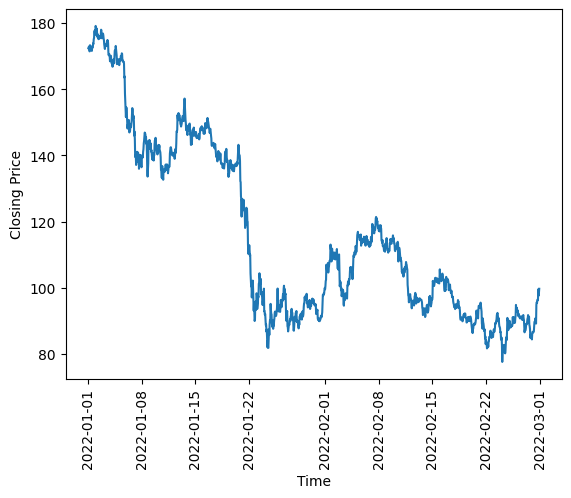

In [31]:
# Plot closing prices for training dataset.
plt.plot(df_training.Close)
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.xticks(rotation=90)
plt.show()

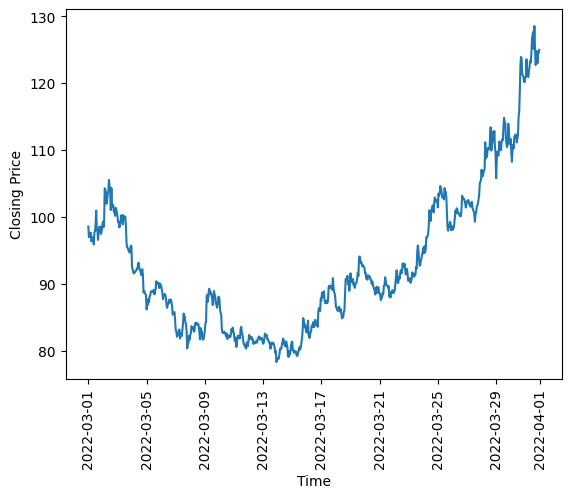

In [32]:
# Plot closing prices for test dataset.
plt.plot(df_test.Close)
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.xticks(rotation=90)
plt.show()

In [33]:
closing_prices_training = df_training.Close # Extract closing prices from training dataset.
closing_prices_test = df_test.Close # Extract closing prices from test dataset.

log_rets_training = pd.Series(np.log(closing_prices_training) - np.log(closing_prices_training.shift(1))).dropna() # Compute log returns for training dataset.
log_rets_test = pd.Series(np.log(closing_prices_test) - np.log(closing_prices_test.shift(1))).dropna() # Compute log returns for test dataset.

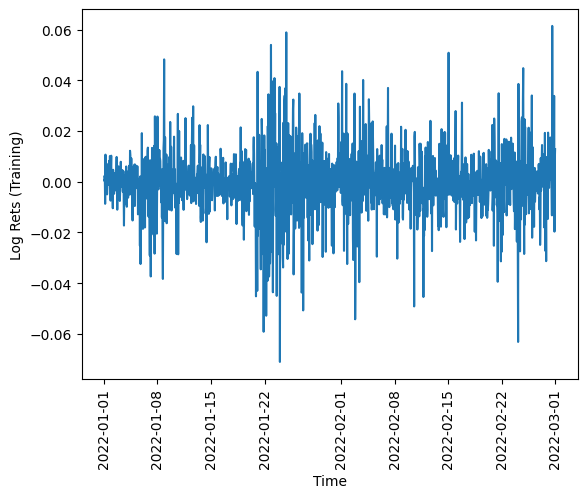

In [37]:
# Plot log rets for training dataset.
plt.plot(log_rets_training)
plt.xlabel('Time')
plt.ylabel('Log Rets (Training)')
plt.xticks(rotation=90)
plt.show()

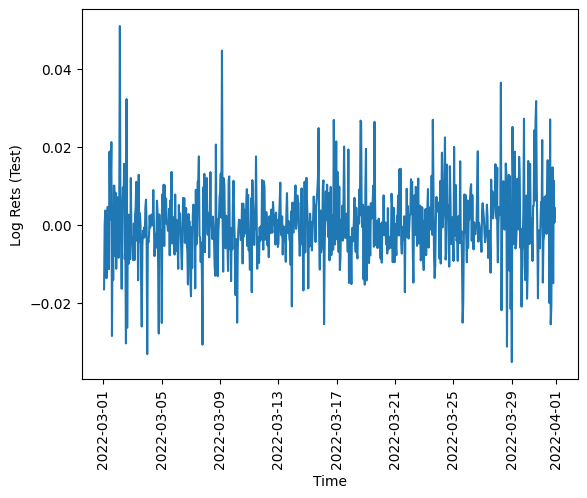

In [38]:
# Plot log rets for test dataset.
plt.plot(log_rets_test)
plt.xlabel('Time')
plt.ylabel('Log Rets (Test)')
plt.xticks(rotation=90)
plt.show()

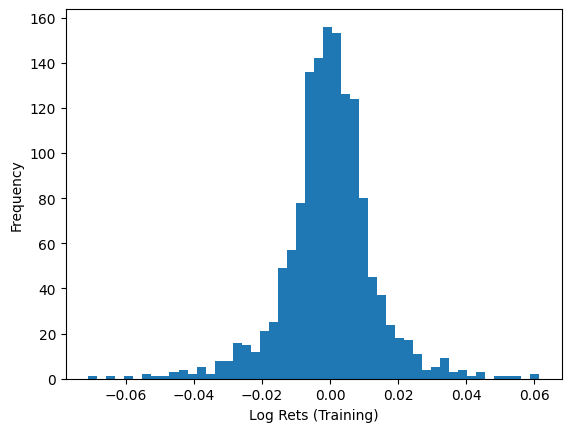

In [42]:
# Plot log returns' distribution (training dataset).
n_bins = 50 # Histogram's number of bins. 
plt.hist(log_rets_training, bins=n_bins)
plt.xlabel('Log Rets (Training)')
plt.ylabel('Frequency')
plt.show()

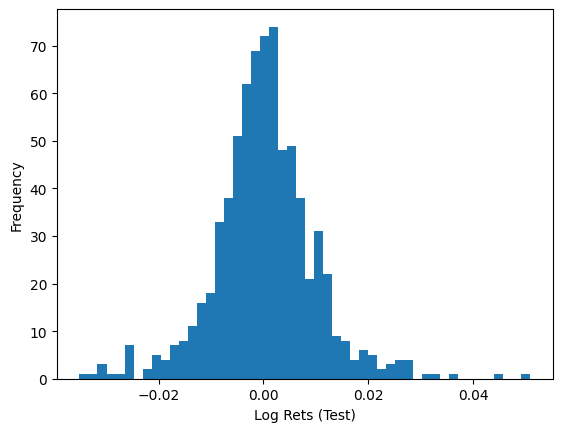

In [43]:
# Plot log returns' distribution (test dataset).
n_bins = 50 # Histogram's number of bins. 
plt.hist(log_rets_test, bins=n_bins)
plt.xlabel('Log Rets (Test)')
plt.ylabel('Frequency')
plt.show()

In [44]:
# Compute statistics for log returns.
mean_training = np.mean(log_rets_training)
mean_test = np.mean(log_rets_test)
std_training = np.std(log_rets_training)
std_test = np.std(log_rets_test)
quantile_25_training = np.quantile(log_rets_training, 0.25)
quantile_25_test = np.quantile(log_rets_test, 0.25)
quantile_75_training = np.quantile(log_rets_test, 0.25)
quantile_75_test = np.quantile(log_rets_test, 0.75)